============================================================================================================================

<div class="alert alert-danger">
<h2> <center>Artificial Neural Network

                                                                                                Nama : Sandi Nopriansyah
                                                                                                NIM  : 09011381722111
<div class="alert alert-dark">
<h2> <center>
 
 ## CLASSIFICATION OF RADAR RETRUNS FROM THE IONOSPHERE USING ANN

<div class="alert alert-info">
Abstrak

Dalam penelitian ionosfer, kita harus mengklasifikasikan pengembalian radar dari ionosfer sebagai cocok untuk selanjutnya
analisis atau tidak. Tugas yang memakan waktu ini biasanya membutuhkan intervensi manusia. Kami menguji beberapa
jaringan neural feedforward yang berbeda untuk menyelidiki efek dari tipe jaringan (single-layer versus multilayer)
dan jumlah node tersembunyi pada kinerja. Seperti yang diharapkan, jaringan multilayer feedforward
(MLFN'S) mengungguli jaringan single-layer, mencapai akurasi 1000/0 pada set pelatihan dan
akurasi hingga 980/0 pada set pengujian. Angka yang sebanding untuk jaringan lapisan tunggal adalah 94,50 / 0
dan 92 0/0, masing-masing. Ketika ukuran sensitivitas, spesifisitas, dan proporsi varian diperhitungkan
karena dengan model yang dipertimbangkan, keunggulan MLFN di atas jaringan single-layer bahkan lebih
menyolok.




============================================================================================================================

<div class="alert alert-danger">
<h2> <center>Penjelasan sekilas ANN

Permodelan jaringan pada ANN ada 3 macam, yaitu :
1. Single layer

Dalam ANN, neuron disusun dalam bentuk lapisan (layer). Pembentukan ANN yang paling sederhana yaitu single layer. Cara kerja dari single layer, input layer yang berasal dari sumber node  di proyeksikan langsung ke output layer dari neuron ( node komputasi), tetapi tidak berlaku sebaliknya. Permodelan ini merupakan jenis jaringan feedforward yang dapat dilihat pada gambar 1. Pada gambar tersebut input dan output memiliki 4 node, namun yang dimaksud dengan single layer yaitu output dari jaringan, sedangkan inputnya tidak memiliki pengaruh karena pada saat melakukan input tidak terjadi proses komputasi
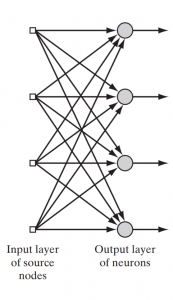
GAMBAR 1




2. Multi layer

Pada single layer apabila terdapat tambahan satu atau dua hidden layer maka jaringan akan terganggu karena input dan output dari jaringan tidak dapat melihat hidden layer yang di masukkan. Sehingga memerlukan jaringan yang bisa menampung nya yaitu bernama multi layer. Cara kerja  multi layer adalah input layer menyuplai input vektor pada jaringan, kemudian input  yang dimasukkan melakukan komputasi pada layer yang kedua, lalu output dari layer yang kedua digunakan sebagai input dari layer yang ketiga dan seterusnya. Ilustrasi jaringan multi layer dapat di lihat pada gambar 2.
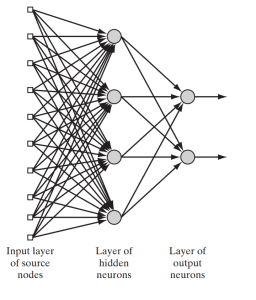
GAMBAR 2


3. Recurrent network

Reccurent network terbentuk karena pada jaringan single layer dan multi layer harus memiliki feedback untuk dirinya sendiri pada setiap loop jaringan nya, pada reccurent network jaringan tidak memerlukan feedback untuk dirinya sendiri melainkan feedback dari input yang digunakan. Ilistrasi jaringan reccurent network dapat dilihat pada gambar 3.
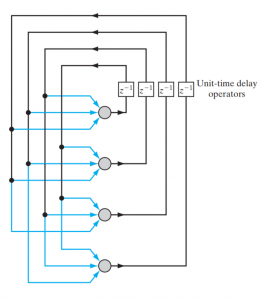 
GAMBAR 3

<div class="alert alert-info">
<h2> <center>Import Library

In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


Sebagai perpustakaan utama, saya menggunakan Panda, Numpy dan waktu; Panda: Gunakan untuk manipulasi data dan analisis data. Numpy: paket mendasar untuk komputasi ilmiah dengan Python. Adapun visualisasi saya menggunakan Matplotlib dan Seaborn. Untuk teknik preprocessing data dan algoritma, saya menggunakan perpustakaan Scikit-learn.

<div class="alert alert-info">
<h2> <center>Import Data atau dataset

In [3]:
df = pd.read_csv('ionosphere_data_kaggle.csv')
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


<div class="alert alert-info">
<h2> <center>Cek Bris Dan Kolom

Cek berapa jumlah baris dan kolom pada data set tersebut dataset tersebut memiliki baris dan kolom = [351,35]

In [4]:
df.shape

(351, 35)

<div class="alert alert-info">
<h2> <center>Mencetak Atau Memeriksa Nilai Yang Hilang

Dari fearture1 Sampai label menunjukan bahwa nilai tidak ada yang hilang (0).
Karena tidak ada nilai yang hilang yang ditemukan dalam dataset, saya tidak menggunakan teknik penanganan nilai yang hilang.

In [5]:
# Print Missing value
print(df.isnull().sum())

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64


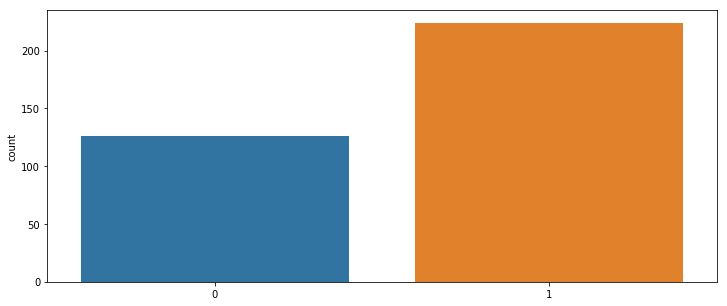

In [14]:
import seaborn as sns
fig, (ax1) = plt.subplots(nrows=1, figsize=(12,5))
sns.countplot(Y)

<div class="alert alert-info">
<h2> <center>Features and Labels

In [21]:
# Biner dalam dataset
print(X[:8,1], '... will now become: ')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_X_country_encoder = LabelEncoder()
X[:,1] = label_X_country_encoder.fit_transform(X[:,1])
print(X[:100,4])

[0. 0. 0. 0. 0. 0. 0. 0.] ... will now become: 
[ 0.93035  1.       1.       0.9414  -0.09924  0.94601  0.       1.
  0.       1.       1.       1.       1.       1.       1.       1.
 -1.       0.66626  0.       1.       0.       1.       0.       1.
  1.       1.       0.       1.       1.       1.       1.       0.93408
  0.41287  0.72314  1.       1.       1.       0.94191  0.99672  1.
  1.       0.86528  1.       0.99793  0.       1.      -1.       0.98103
  1.       0.43644  1.       1.      -1.       0.97487 -1.       1.
  1.       0.94525 -1.       1.       0.       0.99352  0.20833  1.
  1.       1.       1.       0.81309  1.       1.       1.       0.9676
  0.       1.       0.       1.       1.       1.       1.       1.
  1.       0.92679  0.82332  0.6568   0.97464  0.76981  0.89241  0.40392
  0.35     1.      -0.31745  0.64348 -0.33746  0.45331  0.       0.79299
  0.82683  0.       0.79074  0.     ]


In [17]:
print(X[:6,2], '... will now become: ')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_X_gender_encoder = LabelEncoder()
X[:,2] = label_X_gender_encoder.fit_transform(X[:,2])
print(X[:34,2])

[217. 217. 217. 217.  12. 205.] ... will now become: 
[217. 217. 217. 217.  12. 205.   9. 200.   7. 217. 217. 217. 217. 217.
  58. 215.   9.  82. 217. 217. 217. 198.   0. 217. 217. 217.   0. 217.
   0. 217. 217. 145.  90. 217.]


<div class="alert alert-info">
<h2> <center>Make Dataset Validation


## Membuat validasi dataset

Validasi ini dilakukan untuk mengetahui bahwa model yang dibuat itu bagus. Kita akan menggunakan metode statistik untuk memperkirakan keakuratan model yang dibuat pada data yang tidak terlihat. Juga diinginkan perkiraan yang lebih konkret mengenai keakuratan model teraik pada data yang tidak terlihat dengan mengevaluasi data aktual yang tidak terlihat.

 

Artinya, kita akan menahan beberapa data yang tidak dapat dilihat oleh algoritma dan akan menggunakan data ini untuk mendapatkan informasi tentang seberapa akurat model terbaik sebenarnya.

 

Kita akan membagi datateset yang telah dimuat menjadi dua, 80% diantaranya akan digunakan untuk melatih model dan 20% digunakan untuk data validasi.

In [6]:
# split into input (X) and output (Y) variables

X = df.values[1:,0:34].astype(float)
Y = df.values[1:,34]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

<div class="alert alert-info">
<h2> <center>Make a Model 

<div class="alert alert-warning">
<h2> <center>RELU

ReLU atau Rectified Linear Unit menjadi salah satu activation function yang popular belakangan ini, Vincent Vanhoucke dalam course deep learningnya di udacity mengatakan bahwa ReLU merupakan activation function favorit para engineer yang malas, kenapa engineer yang malas?

f(x) = max( 0, x)

Karna ReLU pada intinya hanya membuat pembatas pada bilangan nol, artinya apabila x ≤ 0 maka x = 0 dan apabila x > 0 maka x = x

Ada beberapa pro dan kontra ketika kita menggunakan ReLU:

    (+) ReLU sangat mempercepat proses konvergensi yang dilakukan dengan stochastic gradient descent jika dibandingkan dengan sigmoid / tanh.
    (+) Jika kita bandingan dengan sigmoid/tanh yang memiliki operasi-operasi yang “expensive” (exponentials, etc.), ReLU bisa kita implementasikan hanya dengan membuat pembatas(threshold) pada bilangan nol.
    (-) Sayangnya, unit ReLU bisa menjadi rapuh pada saat proses training dan bisa membuat unit tersebut “mati”. Sebagai contohnya, kita mungkin bisa menemukan bahwa 40% dari network kita “mati” (neuron yang tidak akan pernah aktif selama proses training) apabila learning rate yang kita inisialisasi terlalu tinggi. Namun apabila kita menginisialisasi learning rate kita secara tepat maka hal seperti ini jarang menjadi masalah.

In [39]:
# create model
model = Sequential()
model.add(Dense(34, input_dim=34 , activation= 'relu' ))
model.add(Dense(34, input_dim=34 , activation= 'relu' ))
model.add(Dense(34, input_dim=34 , activation= 'relu' ))
model.add(Dense(1,  activation= 'sigmoid' ))


<div class="alert alert-info">
<h2> <center>Menyusun Model

menyesuaikan untuk training test

In [40]:
# Compile model
epochs = 120
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss= 'binary_crossentropy' , optimizer=sgd, metrics=[ 'accuracy' ])


In [41]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=8, verbose=2)

Train on 234 samples, validate on 116 samples
Epoch 1/120
 - 1s - loss: 0.5640 - accuracy: 0.6667 - val_loss: 0.1745 - val_accuracy: 0.9655
Epoch 2/120
 - 0s - loss: 0.3929 - accuracy: 0.8675 - val_loss: 0.3846 - val_accuracy: 0.9397
Epoch 3/120
 - 0s - loss: 0.3307 - accuracy: 0.8675 - val_loss: 0.0900 - val_accuracy: 0.9741
Epoch 4/120
 - 0s - loss: 0.4049 - accuracy: 0.8376 - val_loss: 1.4450 - val_accuracy: 0.4310
Epoch 5/120
 - 0s - loss: 0.4598 - accuracy: 0.8205 - val_loss: 0.1729 - val_accuracy: 0.9655
Epoch 6/120
 - 0s - loss: 0.2778 - accuracy: 0.8889 - val_loss: 0.2684 - val_accuracy: 0.9741
Epoch 7/120
 - 0s - loss: 0.2030 - accuracy: 0.9359 - val_loss: 0.1827 - val_accuracy: 0.9828
Epoch 8/120
 - 0s - loss: 0.1928 - accuracy: 0.9274 - val_loss: 0.0872 - val_accuracy: 0.9828
Epoch 9/120
 - 0s - loss: 0.1378 - accuracy: 0.9487 - val_loss: 0.0794 - val_accuracy: 0.9828
Epoch 10/120
 - 0s - loss: 0.1846 - accuracy: 0.9274 - val_loss: 0.3354 - val_accuracy: 0.9655
Epoch 11/120


Epoch 87/120
 - 0s - loss: 0.0157 - accuracy: 0.9957 - val_loss: 0.0697 - val_accuracy: 0.9828
Epoch 88/120
 - 0s - loss: 0.0156 - accuracy: 0.9957 - val_loss: 0.0766 - val_accuracy: 0.9828
Epoch 89/120
 - 0s - loss: 0.0165 - accuracy: 0.9957 - val_loss: 0.0794 - val_accuracy: 0.9828
Epoch 90/120
 - 0s - loss: 0.0141 - accuracy: 0.9957 - val_loss: 0.0787 - val_accuracy: 0.9828
Epoch 91/120
 - 0s - loss: 0.0147 - accuracy: 0.9957 - val_loss: 0.0788 - val_accuracy: 0.9828
Epoch 92/120
 - 0s - loss: 0.0167 - accuracy: 0.9957 - val_loss: 0.0823 - val_accuracy: 0.9828
Epoch 93/120
 - 0s - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0827 - val_accuracy: 0.9828
Epoch 94/120
 - 0s - loss: 0.0148 - accuracy: 0.9957 - val_loss: 0.1158 - val_accuracy: 0.9569
Epoch 95/120
 - 0s - loss: 0.0133 - accuracy: 0.9957 - val_loss: 0.0894 - val_accuracy: 0.9828
Epoch 96/120
 - 0s - loss: 0.0124 - accuracy: 0.9957 - val_loss: 0.0913 - val_accuracy: 0.9828
Epoch 97/120
 - 0s - loss: 0.0122 - accuracy: 0.99

In [36]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

350/350 [==============================] - 0s 57us/step
accuracy: 98.86%


## Grafik Accuracy Dan Loss

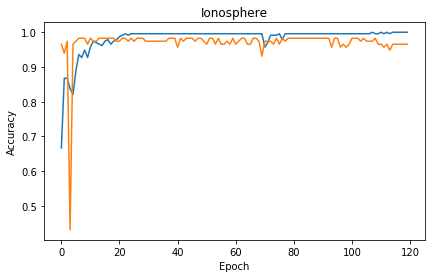

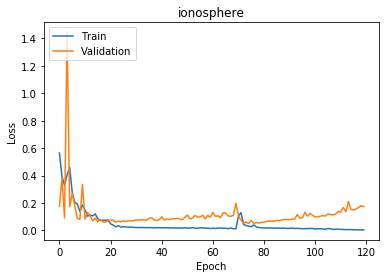

In [42]:

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Ionosphere')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ionosphere')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



<div class="alert alert-info">
<h2> <center>CONFUSION MATRIK

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =state=42) train_test_split(X, Y, test_size=0.3, random_state=42)

In [20]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

CONFUSION MATRIK adalah tabel yang sering digunakan untuk menggambarkan kinerja model klasifikasi (atau "classifier") pada set data uji yang nilai sebenarnya diketahui.


Pengukuran terhadap kinerja suatu sistem klasifikasi merupakan hal yang penting. Kinerja sistem klasifikasi menggambarkan seberapa baik sistem dalam mengklasifikasikan data. Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang seharusnya .

Berdasarkan jumlah keluaran kelasnya, sistem klasifikasi dapat dibagi menjadi 4 (empat) jenis yaitu klasifikasi binary, multi-class, multi-label dan hierarchical. Pada klasifikasi binary, data masukan dikelompokkan ke dalam salah satu dari dua kelas. Jenis klasifikasi ini merupakan bentuk klasifikasi yang paling sederhana dan banyak digunakan. Contoh penggunaannya antara lain dalam sistem yang melakukan deteksi orang atau bukan, sistem deteksi kendaraan atau bukan, dan sistem deteksi pergerakan atau bukan.

Sementara itu, pada bentuk klasifikasi multi-class, data masukan diklasifikasikan menjadi beberapa kelas. Sebagai contoh sistem yang dapat mengklasifikasikan jenis kendaraan seperti sepeda, sepeda motor, mobil, bus, truk, dan sebagainya. Bentuk klasifikasi multi-label pada dasarnya sama dengan multi-class dimana data dikelompokkan menjadi beberapa kelas, namun pada klasifikasi multi-label, data dapat dimasukkan dalam beberapa kelas sekaligus. Bentuk klasifikasi yang terakhir adalah hierarchical. Data masukan dikelompokkan menjadi beberapa kelas, namun kelas tersebut dapat dikelompokkan kembali menjadi kelas-kelas yang lebih sederhana secara hirarkis. Contohnya dalam penelitian ini, arah pergerakan dikelompokkan menjadi 12 arah pergerakan yang tentunya dapat disederhanakan menjadi 4 arah.




<div class="alert alert-success">

Pada pengukuran kinerja menggunakan confusion matrix, terdapat 4 (empat) istilah sebagai representasi hasil proses klasifikasi. Keempat istilah tersebut adalah
1. True Positive (TP),True Positive (TP) merupakan data positif yang terdeteksi benar.
2. True Negative (TN),Nilai True Negative (TN) merupakan jumlah data negatif yang terdeteksi dengan benar
3. False Positive (FP),False Positive (FP) merupakan data negatif namun terdeteksi sebagai data positif.
4. False Negative (FN),alse Negative (FN) merupakan kebalikan dari True Positive, sehingga data posifit, namun terdeteksi      sebagai data negatif.


<div class="alert alert-success">

Berdasarkan nilai True Negative (TN), False Positive (FP), False Negative (FN), dan True Positive (TP) dapat diperoleh nilai Accuracy, Specificity, Sensitivity, Precision, dan F1 Score.Untuk memperoleh nilai akurasi, presisi dan recall kita dapat menggunakan rumus :

$$Accuracy = \frac {tp+tn}{tp+tn+fp+fn}$$

$$Specificity = \frac {tn}{tn+fp}$$

$$Sensitivity = \frac {tp}{tp+fn}$$

$$Precision = \frac {tp}{tp+fp}$$

$$F1 Score = \frac {2 \times Sensitivity \times Precision}{Sensitivity+ Precision}$$

Menghitung Confusion Matrix pada dataset yang telah diolah, kita deklarasikan model predict dari data training dan data testing

In [21]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)

<div class="alert alert-success">
<h2> <center>Making the Confusion Matrix

Diperoleh dari confusion matrik. Anda dapat mengubah nilai sesuai apa yang diperoleh dalam confusion matriks Anda.

In [176]:
cm

array([[37,  0],
       [ 1, 67]], dtype=int64)

Hasil perolehan nilai Accuracy, Specificity, Sensitivity, Precision, dan F1 Score pada data training

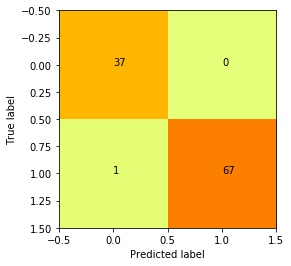

In [179]:
plt.clf()
plt.imshow(cm, cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(cm[i][j]))
plt.show()

In [180]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.99      0.99        68

   micro avg       0.99      0.99      0.99       105
   macro avg       0.99      0.99      0.99       105
weighted avg       0.99      0.99      0.99       105



============================================================================================================================

## Referensi 
- Paper : CLASSIFICATION OF RADAR RETRUNS FROM THE IONOSPHERE USING ANN
- dataset : https://www.kaggle.com/creepyghost/uci-ionosphere


>>>>>>><<<<<<